In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os.path
import os
from scipy.interpolate import interp1d
from scipy.signal import butter,filtfilt
from scipy.optimize import curve_fit
from scipy import odr

#%matplotlib inline
%matplotlib qt
%run Functions_for_RUS_LabView.ipynb

# Import irreducible elastic constants

In [2]:
folder = "C:\\Users\\j111\\Box Sync\\Projects"
#folder = "C:\\Users\\Florian\\Box Sync\\Projects"
project = "\\Mn3Ge\\RUS\\Mn3Ge_2007A\\irreducible_elastic_constants.txt"
project1 = "\\Mn3.019Sn0.981\\RUS\\2007A\\irreducible_elastic_constants.txt"

data = import_data (folder+project, 2, 'all')
T = data[0]
Cirrep = data[1:]
dCirrep = np.array([i-i[-1] for i in Cirrep])

data1 = import_data (folder+project1, 2, 'all')
T1 = data1[0]
Cirrep1 = data1[1:]
dCirrep1 = np.array([i-i[-1] for i in Cirrep1])

# Plot elastic constants vs temperature

In [3]:
Tmin = 395.1 # Mn3.019Sn0.981
Tmax = 434.9


fs = 20
ls = 18

mask = np.array([(i >= Tmin) & (i <= Tmax) for i in T])

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:gray']
label_irrep = ['A1g1', 'A1g2', 'A1g3', 'E1g', 'E2g']

plt.figure(figsize=(17,6))

for i in np.arange(len(dCirrep)):
    #ax[0].scatter(Tintmask[mask], dCirrmask[i][mask]*100, s=10, label=label[i])
    plt.plot(T[mask], Cirrep[i][mask], label=label_irrep[i], linewidth=2, c=colors[i])

In [6]:
Tmin = 370-17 # Mn3Ge
Tmax = 370+17

Tmin1 = 415-17 # Mn3.019Sn0.981
Tmax1 = 415+17


fs = 20
ls = 18
lsize = 13

# linewidth
lw = 3

mask = np.array([(i >= Tmin) & (i <= Tmax) for i in T])
mask1 = np.array([(i >= Tmin1) & (i <= Tmax1) for i in T1])

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:gray']
label_irrep = ['$\mathrm{ (c_{11}+c_{12}/2) \, (A_{1g}) }$ ', '$\mathrm{c_{33} \, (A_{1g})}$', '$\mathrm{2c_{13} \, (A_{1g})}$', '$\mathrm{4c_{44} \, (E_{1g})}$', '$\mathrm{(c_{11}-c_{12}/2) \, (E_{2g})}$']

fig, ax = plt.subplots(2,2, figsize=(13,7), gridspec_kw={'hspace': 0, 'wspace':0.04})

for i in np.arange(len(dCirrep)-2):
    #ax[0].scatter(Tintmask[mask], dCirrmask[i][mask]*100, s=10, label=label[i])
    ax[0,0].plot(T[mask], dCirrep[i][mask], label=label_irrep[i], linewidth=lw, c=colors[i])
    
ax[0,0].legend(loc=(.52, .075), fontsize=lsize)
#ax[0].set_title('Compressional Modes', fontsize=fs)

ax[0,0].tick_params(axis="both",direction="in", labelsize=ls, bottom='True', top='True', left='True', right='True', length=4, width=1, which = 'major', labelbottom=False)

ax[0,0].set_ylabel('$\mathrm{\Delta c}$ (GPa)',fontsize=fs)
ax[0,0].set_yticks([-20, -15, -10, -5, 0])
ax[0,0].yaxis.set_label_coords(-0.15, 0.5)

#ax[0,0].set_xlabel('Temperature (K)',fontsize=fs)
ax[0,0].set_xlim([Tmin, Tmax])


for i in [len(dCirrep)-2, len(dCirrep)-1]:
    #ax[1].scatter(Tintmask[mask], dCirrmask[i][mask]*100, s=10, label=label[i])
    ax[1,0].plot(T[mask], dCirrep[i][mask], label=label_irrep[i], linewidth=lw, c=colors[i])
    
ax[1,0].legend(loc=(.52, .075), fontsize=lsize)
#ax[1].set_title('Shear Modes', fontsize=fs)
    
#ax[1,0].yaxis.tick_right()
ax[1,0].tick_params(axis="both",direction="in", labelsize=ls, bottom='True', top='True', left='True', right='True', length=4, width=1, which = 'major')

ax[1,0].set_ylabel('$\mathrm{\Delta c}$ (GPa)',fontsize=fs)
ax[1,0].set_yticks([-5, -2.5, 0, 2.5, 5])
ax[1,0].yaxis.set_label_coords(-0.15, 0.5)

ax[1,0].set_xlabel('Temperature (K)',fontsize=fs)

ax[1,0].set_xlim([Tmin, Tmax])



for i in np.arange(len(dCirrep1)-2):
    ax[0,1].plot(T1[mask1], dCirrep1[i][mask1], label=label_irrep[i], linewidth=lw, c=colors[i])

ax[0,1].set_xlim([Tmin1, Tmax1])
ax[0,1].yaxis.tick_right()
ax[0,1].set_yticks([-2, 0, 2, 4])
ax[0,1].set_ylabel('$\mathrm{\Delta c}$ (GPa)',fontsize=fs, rotation=270)
ax[0,1].yaxis.set_label_coords(1.1, 0.5)
ax[0,1].tick_params(axis="both",direction="in", labelsize=ls, bottom='True', top='True', left='True', right='True', length=4, width=1, which = 'major', labelbottom=False)




for i in [len(dCirrep1)-2, len(dCirrep1)-1]:
    ax[1,1].plot(T1[mask1], dCirrep1[i][mask1], label=label_irrep[i], linewidth=lw, c=colors[i])

ax[1,1].set_xlim([Tmin1, Tmax1])
ax[1,1].yaxis.tick_right()
ax[1,1].set_yticks([-1, 0, 1, 2, 3])
ax[1,1].set_ylabel('$\mathrm{\Delta c}$ (GPa)',fontsize=fs, rotation=270)
ax[1,1].set_xlabel('Temperature (K)',fontsize=fs)
ax[1,1].yaxis.set_label_coords(1.1, 0.5)
ax[1,1].tick_params(axis="both",direction="in", labelsize=ls, bottom='True', top='True', left='True', right='True', length=4, width=1, which = 'major')


#plt.savefig('elastic_constants.pdf', bbox_inches='tight')#, dpi=500)

In [23]:
Tmin = 370-17 # Mn3Ge
Tmax = 370+17

Tmin1 = 415-17 # Mn3.019Sn0.981
Tmax1 = 415+17


fs = 20
ls = 18
lsize = 13

# linewidth
lw = 3

mask = np.array([(i >= Tmin) & (i <= Tmax) for i in T])
mask1 = np.array([(i >= Tmin1) & (i <= Tmax1) for i in T1])

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:gray']
label_irrep = ['$\mathrm{ (c_{11}+c_{12}/2) \, (A_{1g}) }$ ', '$\mathrm{c_{33} \, (A_{1g})}$', '$\mathrm{2c_{13} \, (A_{1g})}$', '$\mathrm{4c_{44} \, (E_{1g})}$', '$\mathrm{(c_{11}-c_{12}/2) \, (E_{2g})}$']

fig, ax = plt.subplots(1,2, figsize=(13,5), gridspec_kw={'hspace': 0, 'wspace':0.04})

for i in np.arange(len(dCirrep)):
    #ax[0].scatter(Tintmask[mask], dCirrmask[i][mask]*100, s=10, label=label[i])
    ax[0].plot(T[mask], dCirrep[i][mask], label=label_irrep[i], linewidth=lw, c=colors[i])
    
ax[0].legend(loc=(.53, .03), fontsize=lsize)
#ax[0].set_title('Compressional Modes', fontsize=fs)

ax[0].tick_params(axis="both",direction="in", labelsize=ls, bottom='True', top='True', left='True', right='True', length=4, width=1, which = 'major')

ax[0].set_ylabel('$\mathrm{\Delta c}$ (GPa)',fontsize=fs)
ax[0].set_yticks([-20, -15, -10, -5, 0, 5])
#ax[0].yaxis.set_label_coords(-0.15, 0.5)

#ax[0].set_xlabel('Temperature (K)',fontsize=fs)
ax[0].set_xlim([Tmin, Tmax])
ax[0].set_xlabel('Temperature (K)',fontsize=fs)




for i in np.arange(len(dCirrep1)):
    ax[1].plot(T1[mask1], dCirrep1[i][mask1], label=label_irrep[i], linewidth=lw, c=colors[i])

ax[1].set_xlim([Tmin1, Tmax1])
ax[1].set_ylim([-4.1, 4.1])
ax[1].yaxis.tick_right()
ax[1].set_yticks([-4, -2, 0, 2, 4])
ax[1].set_ylabel('$\mathrm{\Delta c}$ (GPa)',fontsize=fs, rotation=270)
ax[1].yaxis.set_label_coords(1.1, 0.5)
ax[1].tick_params(axis="both",direction="in", labelsize=ls, bottom='True', top='True', left='True', right='True', length=4, width=1, which = 'major')
ax[1].set_xlabel('Temperature (K)',fontsize=fs)

plt.savefig('elastic_constants.pdf', bbox_inches='tight')#, dpi=500)

# compare experimental high temperature frequencies to calculated ones in rpr_out

### import resonance frequencies from rpr_out

In [5]:
#folder = "C:\\Users\\j111\\Box Sync\\Projects"
folder = "C:\\Users\\Florian\\Box Sync\\Projects"
project = "\\Mn3Ge\\RUS\\sample_with_green_face_from_010920\\high_T_011320\\rprout_386K_all_resonances.dat"

name = folder + project
data = []

f = open(name, 'r')
for i in np.arange(6):
    f.readline()

for line in f:
    line=line.strip()
    line=line.split()
    
    relevant_data = []
    if len(line) == 12:
        if len(line[0]) == 1 or len(line[0]) == 2:
            for i in [1, 2, 7, 8, 9, 10, 11]:
                relevant_data.append(float(line[i]))
            
            data.append(np.array(relevant_data))
    
data = np.array(data)

fht_exp = data[:, 0]
fht_calc = data[:, 1]

### import a high temperature scan

In [7]:
folder = "C:\\Users\\Florian\\Box Sync\\Projects"
#folder = "C:\\Users\\j111\\Box Sync\\Projects"
project = "\\Mn3Ge\\RUS\\sample_with_green_face_from_010920\\high_T_011320"

data_files = os.listdir(folder+project)

filename = folder + project + '\\' + data_files[0]
data = []

f = open(filename, 'r')
for i in np.arange(1):
    f.readline()
    
for line in f:
    line=line.strip()
    line=line.split()
        
    for i in np.arange(len(line)):
        line[i] = float(line[i])
        
    data.append(line)

data = np.array(data)
f = data[:,0]/1000
re = data[:,1]*1000
im = data[:,3]*1000

fmin = .75
fmax = 4
mask = (f>fmin) & (f<fmax)

re = re[mask]
f = f[mask]
im = im[mask]

### plot result

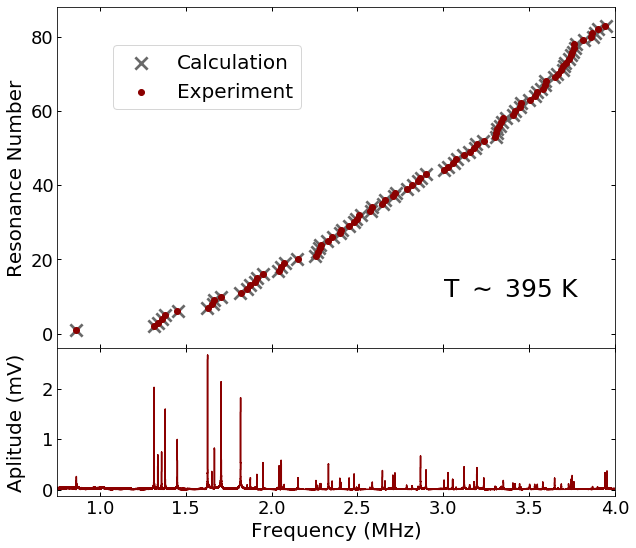

In [8]:
fonts = 20
tickparams = 18
fig, ax = plt.subplots(2,1, figsize=(10,9), sharex = True, gridspec_kw={'hspace': 0, 'height_ratios': [3, 1.3]})

n = len(fht_exp)-7
y = np.arange(len(fht_exp[:n]))+1

ax[0].scatter(fht_calc[:n], y, label='Calculation', marker='x', s=150, linewidth=2.7, c='dimgrey')
ax[0].scatter(fht_exp[:n], y, label='Experiment', c='darkred')

ax[0].legend(loc=(.1, .7), fontsize=fonts)
ax[0].set_ylabel('Resonance Number',fontsize=fonts)

ax[0].tick_params(axis="both",direction="in", labelsize=tickparams, bottom='True', top='True', left='True', right='True', 
                length=4, width=1, which = 'major')




def quadr (x, a, b, c):
    return a*x**2 + b*x + c

popt1, pcov1 = curve_fit(quadr, f, re)
renew = re - quadr(f, popt1[0], popt1[1], popt1[2])

popt2, pcov2 = curve_fit(quadr, f, im)
imnew = im - quadr(f, popt2[0], popt2[1], popt2[2])

amplitude = np.sqrt(renew**2 + imnew**2)
ax[1].plot(f, amplitude, c='darkred')

#ax[1].plot(f, im, c='lightcoral', label='Imaginary')
#ax[1].plot(f, re, c='darkred', label='Real')

ax[1].tick_params(axis="both",direction="in", labelsize=tickparams, bottom='True', top='True', left='True', right='True', 
                length=4, width=1, which = 'major')
#ax[1].yaxis.tick_right()
ax[1].set_ylabel('Aplitude (mV)',fontsize=fonts)#, rotation=270)

#ax[1].yaxis.set_label_position("right")

ax[1].set_xlabel('Frequency (MHz)',fontsize=fonts)

#ax[1].legend(loc=(.7, .6), fontsize=15)


ax[1].set_xlim([0.75, 4])


ax[0].text(3, 10, 'T $\sim$ 395 K', fontsize=25)

ax[0].yaxis.set_label_coords(-0.055, 0.5)
ax[1].yaxis.set_label_coords(-0.055, 0.5)


folder = "C:\\Users\\Florian\\Box Sync\\Projects\\Mn3Ge\\Conferences\\March Meeting 2020\\Presentation"
name = "high_T_scan_with_fit"
filetype = '.png'
#plt.savefig(folder+'\\'+name+filetype, bbox_inches='tight', dpi=1000)

### this is only one high temperature scan

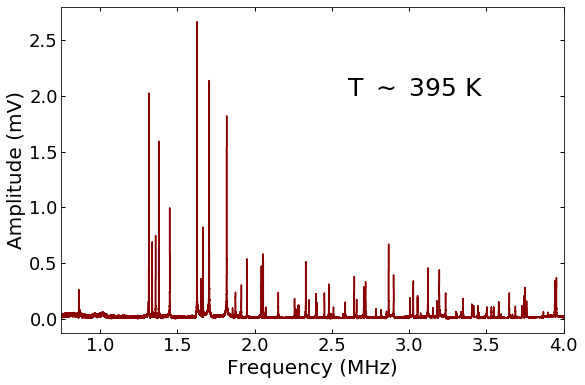

In [9]:
fonts = 20
tickparams = 18
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(f, amplitude, c='darkred')

ax.tick_params(axis="both",direction="in", labelsize=tickparams, bottom='True', top='True', left='True', right='True', 
                length=4, width=1, which = 'major')

ax.set_ylabel('Amplitude (mV)',fontsize=fonts)#, rotation=270)
ax.set_xlabel('Frequency (MHz)',fontsize=fonts)

ax.set_xlim([0.75, 4])

ax.text(2.6, 2, 'T $\sim$ 395 K', fontsize=25)

ax.yaxis.set_label_coords(-0.07, 0.5)


#folder = "C:\\Users\\Florian\\Box Sync\\Projects\\Mn3Ge\\Conferences\\March Meeting 2020\\Presentation"
folder = "C:\\Users\\j111\\Box Sync\\Projects\\Mn3Ge\\Conferences\\March Meeting 2020\\Presentation"
name = "high_T_scan"
filetype = '.png'
#plt.savefig(folder+'\\'+name+filetype, bbox_inches='tight', dpi=500)

# calculate and plot poisson's ratios

In [11]:
# order in CofT is [33, 23, 12, 44, 66]

folder = "C:\\Users\\j111\\Box Sync\\Projects"
folder = "C:\\Users\\Florian\\Box Sync\\Projects"
project = "\\Mn3Ge\\RUS\\sample_with_green_face_from_010920\\elastic_constants_NOT_irreps.txt"

data = import_data (folder+project, 2, 'all')
T = data[0]
CofT = data[1:]


c11 = 2*CofT[4]  + CofT[2]
c12 = CofT[2]
c13 = CofT[1]
c33 = CofT[0]

vxy = (c13**2 - c12 * c33)/(c13**2 - c11 * c33)
vxz = ((c11 - c12) * c13)/(-c13**2 + c11 * c33)

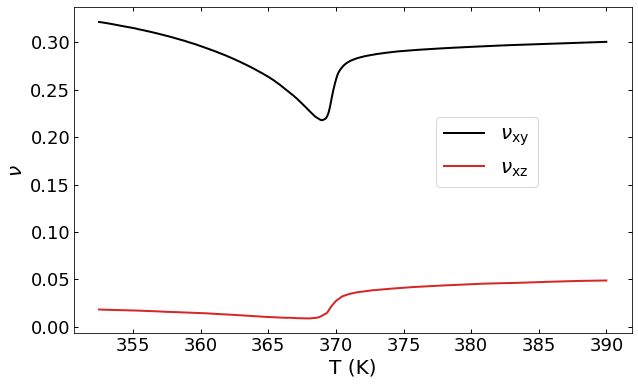

In [13]:
Tmin = 365
Tmax = 375

Tmin = 330
Tmax = 390

mask = np.array([(i >= Tmin) & (i <= Tmax) for i in T])

plt.figure(figsize=(10,6))
plt.plot(T[mask], vxy[mask], label='$\\nu_\mathrm{xy}$', linewidth=2, c='black')
plt.plot(T[mask], vxz[mask], label='$\\nu_\mathrm{xz}$', linewidth=2, c='tab:red')

plt.legend(loc=(.65, .45), fontsize=20)

plt.xlabel('T (K)',fontsize=20)
plt.ylabel("$\\nu$",fontsize=20)
plt.tick_params(axis="both",direction="in", labelsize=18, bottom='True', top='True', left='True', right='True', 
                length=4, width=1, which = 'major')

folder = "C:\\Users\\Florian\\Box Sync\\Projects\\Mn3Ge\\Conferences\\March Meeting 2020\\Presentation"
name = "Poissons_ratio"
filetype = '.png'
#plt.savefig(folder+'\\'+name+filetype, bbox_inches='tight', dpi=500)

In [17]:
# filename = folder + '\\' + name + '.txt'
# if os.path.isfile(filename) == True:
#     x='w'
# else:
#     x='x'
        
# with open(filename, x) as g:
#     g.write('T (K)\tvxy\tvxz\n')
#     for i in np.arange(len(T)):
#         g.write(str(T[i]) + '\t' + str(vxy[i]) + '\t' + str(vxz[i]) + '\n')

# Calculate Bulk modulus and Ehrenfest relations

64.66095138948006 64.81414751864337 64.96734364780669
52.920179225342224 64.58224440648945 11662065181.147226 3.239462550318674e-12
2631.8866254101413
35.08349841174377


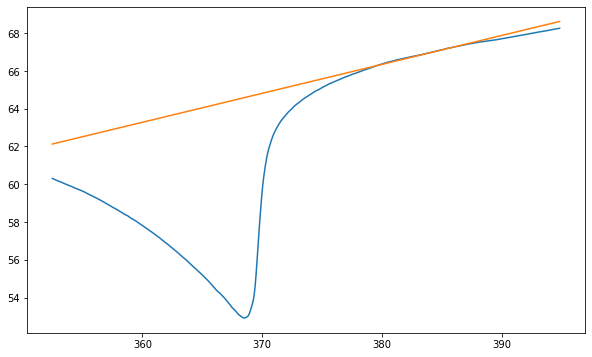

In [10]:
# order in CofT is [33, 23, 12, 44, 66]

folder = "C:\\Users\\j111\\Box Sync\\Projects"
#folder = "C:\\Users\\Florian\\Box Sync\\Projects"
project = "\\Mn3Ge\\RUS\\sample_with_green_face_from_010920\\elastic_constants_NOT_irreps.txt"

data = import_data (folder+project, 2, 'all')
T = data[0]
CofT = data[1:]


c11 = 2*CofT[4]  + CofT[2]
c12 = CofT[2]
c13 = CofT[1]
c33 = CofT[0]

BofT = ( (c11+c12)/2 * c33 - c13**2 ) / (  (c11+c12)/2 + c33 - 2*c13 )

plt.figure(figsize=(10,6))



def line (x, a, b):
    return a*x + b


Tmin = 378
Tmax = 388
mask = np.array([(i >= Tmin) & (i <= Tmax) for i in T])


popt, pcov = curve_fit(line, T[mask], BofT[mask])

plt.plot(T, BofT)
plt.plot(T, line(T, popt[0], popt[1]))


BatTc = BofT[abs(T - 370) < 1]
Bmin = min(BofT)
Tmin = T[BofT == Bmin]
Bmax = line(Tmin, popt[0], popt[1])[0]
deltaB = (Bmax - Bmin) * 10**9 # in Pa
B = 60 * 10**9 # in Pa
deltaBoBsq = deltaB / B**2

# from their paper
deltaC = 31 # J/(mol K)
TN = 365

density = 7358 # kg/m^3
# molar masses in g/mol
Mn = 54.938043
Ge = 72.630
Mn3Ge_molarmass = 3*Mn + Ge

DeltaC = deltaC / (Mn3Ge_molarmass*10**(-3) / density)
DeltaCoT = DeltaC / TN


#DeltaC = 25*10**(-3) / (Mn3Ge_molarmass*10**(-3) / density)
#deltaBoBsq = 5*10**(-5) / (60*10**9)

dTodP = np.sqrt(deltaBoBsq / DeltaCoT) * 10**9


print( line(369, popt[0], popt[1]), line(370, popt[0], popt[1]), line(371, popt[0], popt[1]) )
print( Bmin, Bmax, deltaB, deltaBoBsq )
print(DeltaCoT)
print(dTodP)

In [11]:
np.sqrt( 0.005*10**9 / DeltaCoT ) / 100

0.43586441497595835

# plot frequencies with widths next to elastic constants

C:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in sqrt


(360, 380)

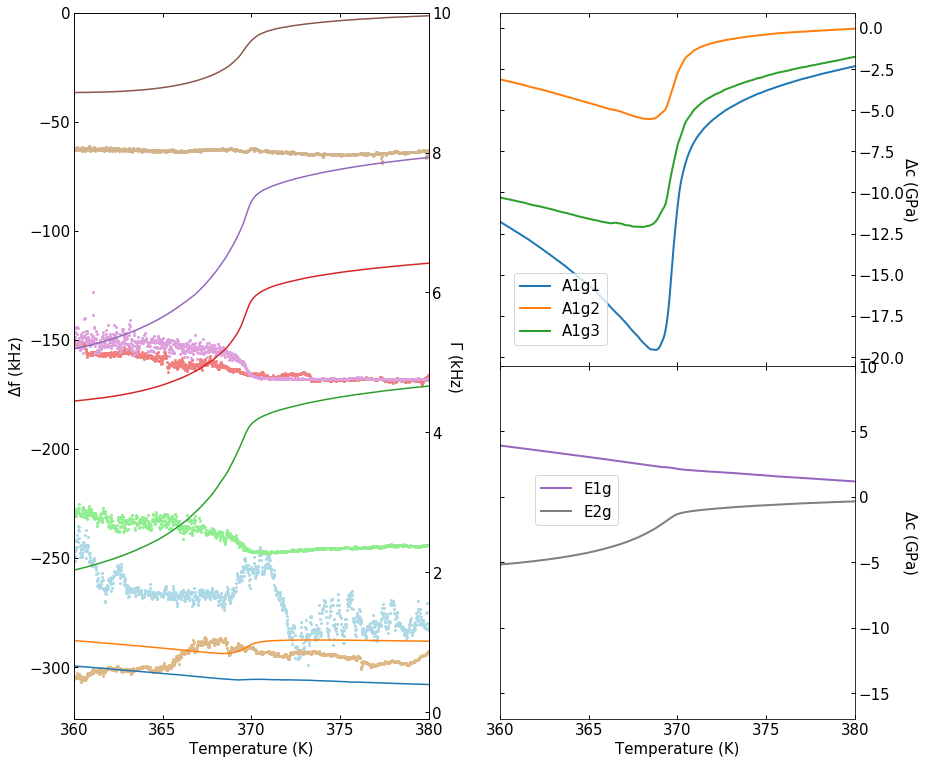

In [12]:
folder = "C:\\Users\\j111\\Box Sync\\Projects"
#folder = "C:\\Users\\Florian\\Box Sync\\Projects"
project1 = "\\Mn3Ge\\RUS\\sample_with_green_face_from_010920\\resonance_frequencies.txt"
project2 = "\\Mn3Ge\\RUS\\sample_with_green_face_from_010920\\resonance_widths.txt"

data = import_data (folder+project1, 2, 'all')
T = data[0]
flp = data[1:]
dflp = np.array( [f-f[-1] for f in flp] )

data = import_data (folder+project2, 2, 'all')
gint = data[1:]


Tmin = 360
Tmax = 380

mask = np.array([(i >= Tmin) & (i <= Tmax) for i in T])

fig = plt.figure(constrained_layout=False,figsize=(14,13))
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0.2)


ax1 = fig.add_subplot(gs[:, 0]) ############################################################################################

ax1.set_ylabel('$\Delta$f (kHz)',fontsize=15)
ax1.tick_params(axis="both",direction="in", labelsize=15, bottom='True', top='True', left='True', right='True', 
                length=4, width=1, which = 'major')
ax1.set_zorder(1)    # update zorder
ax1.patch.set_visible(False)  

ax1.set_xlabel('Temperature (K)',fontsize=15)

    
shift = np.array([-362, -341, -215, -160, -110, -50])+50
k = 0
#for i in [0, 1, 4, 5, 6, 7, 8]:
#for i in np.arange(len(ffinal)):
for i in [1, 2, 5, 6, 9, 10]:
    ax1.plot(T[mask], dflp[i][mask]+shift[k], zorder=1)
    k=k+1

#ax1.legend(loc=(0.8,0.2), fontsize=15)
ax1.set_ylim(-324, 0)
ax1.set_xlim([Tmin, Tmax])

    
    
ax4 = ax1.twinx()
    
ax4.set_zorder(0)    # update zorder
ax4.tick_params(axis="both",direction="in", labelsize=15, bottom='True', top='True', left='False', right='True', 
                length=4, width=1, which = 'major')
ax4.yaxis.tick_right()

ax4.set_ylabel('$\Gamma$ (kHz)',fontsize=15, rotation=270)
ax4.yaxis.set_label_coords(1.1, 0.5)


mask_int = (T >= Tmin) & (T <= Tmax)

colors = ['lightblue', 'burlywood', 'lightgreen', 'lightcoral', 'plum', 'tan', 'pink', 'gray', 'olive']
shift= [-0.2, -0.4, 1.9, 4.5, 4.7 , 7.5]
k = 0
#for i in [0, 1, 4, 5, 6, 7, 8]:
#for i in np.arange(len(fint)):
for i in [1, 2, 5, 6, 9, 10]:
    ax4.scatter(T[mask_int], gint[i][mask_int]+shift[k], c=colors[k], zorder=0, s=4)
    k=k+1
    
ax4.set_ylim([-0.1, 10])


ax2 = fig.add_subplot(gs[0, 1])  ############################################################################################
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:gray']

label_irrep = ['A1g1', 'A1g2', 'A1g3', 'E1g', 'E2g']
for i in np.arange(len(dCirrep)-2):
    #ax2.scatter(Tintmask[mask], dCirrmask[i][mask]*100, s=10, label=label[i])
    ax2.plot(T[mask], dCirrep[i][mask], label=label_irrep[i], linewidth=2, c=colors[i])


dcA1g3_calc = -np.sqrt(dCirrep[0] * dCirrep[1])
#ax2.plot(Tfinal[mask], dcA1g3_calc[mask], label='A1g,3 calc.', linewidth=2, c='tab:green', linestyle='--')


    
    
ax2.legend(loc=(.04, .06), fontsize=15)

ax2.yaxis.tick_right()
ax2.tick_params(axis="both",direction="in", labelsize=15, bottom='True', top='True', left='True', right='True', 
                length=4, width=1, which = 'major')
ax2.set_xticklabels([])

ax2.set_ylabel('$\mathrm{\Delta c}$ (GPa)',fontsize=15, rotation=270)
ax2.yaxis.set_label_coords(1.13, 0.5)
ax2.set_xlim([Tmin, Tmax])





ax3 = fig.add_subplot(gs[1, 1])  ############################################################################################

for i in [len(dCirrep)-2, len(dCirrep)-1]:
    #ax3.scatter(Tintmask[mask], dCirrmask[i][mask]*100, s=10, label=label[i])
    ax3.plot(T[mask], dCirrep[i][mask], label=label_irrep[i], linewidth=2, c=colors[i])
    
ax3.legend(loc=(.1, .55), fontsize=15)
    
ax3.yaxis.tick_right()
ax3.tick_params(axis="both",direction="in", labelsize=15, bottom='True', top='True', left='True', right='True', 
                length=4, width=1, which = 'major')

ax3.set_ylabel('$\mathrm{\Delta c}$ (GPa)',fontsize=15, rotation=270)
ax3.yaxis.set_label_coords(1.13, 0.5)

ax3.set_xlabel('Temperature (K)',fontsize=15)

ax3.set_ylim([-17, 10])


ax3.set_xlim([Tmin, Tmax])